In [5]:
from random import random

import flappy_bird_gymnasium
from gymnasium import envs

print(envs.registry.keys())
import numpy as np
import gymnasium

# Configurare
env = gymnasium.make("FlappyBird-v0", render_mode="human", use_lidar=True,)

dict_keys(['CartPole-v0', 'CartPole-v1', 'MountainCar-v0', 'MountainCarContinuous-v0', 'Pendulum-v1', 'Acrobot-v1', 'phys2d/CartPole-v0', 'phys2d/CartPole-v1', 'phys2d/Pendulum-v0', 'LunarLander-v3', 'LunarLanderContinuous-v3', 'BipedalWalker-v3', 'BipedalWalkerHardcore-v3', 'CarRacing-v3', 'Blackjack-v1', 'FrozenLake-v1', 'FrozenLake8x8-v1', 'CliffWalking-v0', 'Taxi-v3', 'tabular/Blackjack-v0', 'tabular/CliffWalking-v0', 'Reacher-v2', 'Reacher-v4', 'Reacher-v5', 'Pusher-v2', 'Pusher-v4', 'Pusher-v5', 'InvertedPendulum-v2', 'InvertedPendulum-v4', 'InvertedPendulum-v5', 'InvertedDoublePendulum-v2', 'InvertedDoublePendulum-v4', 'InvertedDoublePendulum-v5', 'HalfCheetah-v2', 'HalfCheetah-v3', 'HalfCheetah-v4', 'HalfCheetah-v5', 'Hopper-v2', 'Hopper-v3', 'Hopper-v4', 'Hopper-v5', 'Swimmer-v2', 'Swimmer-v3', 'Swimmer-v4', 'Swimmer-v5', 'Walker2d-v2', 'Walker2d-v3', 'Walker2d-v4', 'Walker2d-v5', 'Ant-v2', 'Ant-v3', 'Ant-v4', 'Ant-v5', 'Humanoid-v2', 'Humanoid-v3', 'Humanoid-v4', 'Humanoid-v5

In [6]:

# Q-Learning
alpha = 0.1
gamma = 0.99
epsilon = 1.0
epsilon_decay = 0.995
num_episodes = 100


In [7]:
from torchvision import transforms
'''preprocessing img'''
preprocess = transforms.Compose([
    transforms.ToPILImage(),              # Conversie la imagine PIL
    transforms.Grayscale(num_output_channels=1),               # Convertire în tonuri de gri
    transforms.Resize((84,84)),         # Redimensionare la 84x84 pixeli
    transforms.ToTensor() # Conversie la tensor PyTorch
])

In [8]:
from collections import deque
import random

'''replay buffer class'''
class ReplayBuffer:
    def __init__(self, capacity):
        self.buffer = deque(maxlen=capacity)  # Buffer cu lungime maximă
    
    def add(self, experience):
        self.buffer.append(experience)  # Adaugă experiența (state, action, reward, next_state, done)
    
    def sample(self, batch_size):
        return random.sample(self.buffer, batch_size)  # Selectează un eșantion aleatoriu
    
    def __len__(self):
        return len(self.buffer)


In [9]:

'''initialize replay_buffer'''
replay_buffer = deque(maxlen=20000)  # Buffer pentru stocarea tranzițiilor


In [6]:
print(env.action_space)

Discrete(2)


In [7]:
import gym
import keyboard  


import numpy as np
from collections import deque

'''add to buffer frames form game'''

# Configurare environment
env = gymnasium.make("FlappyBird-v0", render_mode="rgb_array" , use_lidar=False)

for i in range(100):
    
    # Joc manual
    state = env.reset()
    done = False
    count_frames=0

    # Inițializează primul frame procesat
    frame = env.render()
    
    processed_current_frame = preprocess(frame)     
    while not done:
        
        # play manual (space = jump, altfel = stay)
        # if keyboard.is_pressed("space"):
        #     action = 1  # Jump
        # else:
        #     action = 0 
        # Stay
        
        if np.random.rand() < 0.1:
            action = 1
        else:
            action = 0 
    
        new_state, reward, done,_, info = env.step(action)
        
        next_frame = env.render()
        
        processed_next_frame = preprocess(next_frame)
        # Extrage array-ul de 12 valori din new_state
        """
        new_state contains :
        'last_pipe_horizontal_position',
        'last_top_pipe_vertical_position',
        'last_bottom_pipe_vertical_position'
        'next_pipe_horizontal_position'
        'next_top_pipe_vertical_position'
        'next_bottom_pipe_vertical_position',
        'next_next_pipe_horizontal_position'
        'next_next_top_pipe_vertical_position',
        'next_next_bottom_pipe_vertical_position',
        'player_vertical_position',
        'player_vertical_velocity',
        'player_rotation'
        """
        
        # Add to replay buffer
        if count_frames % 4 == 0 or done:
            replay_buffer.append((processed_current_frame, action, reward,processed_next_frame, new_state, done))
        
        # Actualize for next iteration
        processed_current_frame = processed_next_frame
        count_frames += 1
        if done:
            break
    

KeyboardInterrupt: 

In [27]:
print(f"Buffer size: {len(replay_buffer)}")
# print(f"buffer one example",replay_buffer[0],len(replay_buffer[0]))


Buffer size: 20000


In [11]:
import numpy as np
from collections import deque
'''view and look at states forms'''

# Configurare environment
env = gymnasium.make("FlappyBird-v0", render_mode="human" , use_lidar=False)
for i in range(num_episodes):
    
    # Joc manual
    state = env.reset()
    done = False
    count_frames=0
    
    frame =env.render() 
    print(" frame " ,frame)
    
    while not done:
        
        # Joacă manual (space = jump, altfel = stay)
        if keyboard.is_pressed("space"):
            action = 1  # Jump
        else:
            action = 0 

        new_state, reward, done, _ , info = env.step(action)  
        print("shape",new_state.shape)
        print("new state ",new_state )
        
        # Randează jocul
        frame =env.render() 
        print(" frame " ,frame)
        
        if done:
            break
                

 frame  None
shape (12,)
new state  [ 0.98611111  0.3125      0.5078125   1.          0.          1.
  1.          0.          1.          0.4609375  -0.8         0.46666667]
 frame  None
shape (12,)
new state  [ 0.97222222  0.3125      0.5078125   1.          0.          1.
  1.          0.          1.          0.44726562 -0.7         0.43333333]
 frame  None
shape (12,)
new state  [ 0.95833333  0.3125      0.5078125   1.          0.          1.
  1.          0.          1.          0.43554688 -0.6         0.4       ]
 frame  None
shape (12,)
new state  [ 0.94444444  0.3125      0.5078125   1.          0.          1.
  1.          0.          1.          0.42578125 -0.5         0.36666667]
 frame  None
shape (12,)
new state  [ 0.93055556  0.3125      0.5078125   1.          0.          1.
  1.          0.          1.          0.41796875 -0.4         0.33333333]
 frame  None
shape (12,)
new state  [ 0.91666667  0.3125      0.5078125   1.          0.          1.
  1.          0.        

KeyboardInterrupt: 

In [28]:
from matplotlib import pyplot as plt
# Assuming `processed_frame` is the grayscale image tensor

'''Visualize images from buffer'''

if len(replay_buffer) > 0:
    first_img = replay_buffer[0][0].squeeze(0)
else:
    first_img = None
    
def show_grayscale_image(image_tensor):
    plt.imshow(image_tensor.numpy(), cmap='gray')
    plt.title('Grayscale Image')
    plt.axis('off')
    plt.show()
    plt.pause(0.1)  # Pause to allow the image to be displayed

In [ ]:

for experience in replay_buffer:
    img = experience[0].squeeze(0)  # Extract the grayscale image tensor
    show_grayscale_image(img)
    img = experience[3].squeeze(0)  # Extract the grayscale image tensor
    show_grayscale_image(img)

In [10]:
# CNN
from torch import nn
from torch import optim
from tqdm import tqdm
import torch

'''CNN class definition'''
class CNN(nn.Module):
    """
    Define the layers of the convolutional neural network.

    Parameters:
    in_channels: int
        The number of channels in the input image. For MNIST, this is 1 (grayscale images).
    num_classes: int
        The number of classes we want to predict, in our case 12 .
    """""
    def __init__(self, in_channels, num_classes=12):
        super().__init__()
        # First convolutional layer: 1 input channel, 8 output channels, 3x3 kernel, stride 1, padding 1
        self.conv1 = nn.Conv2d(in_channels=in_channels, out_channels=8, kernel_size=5, stride=1, padding=0)
        # Max pooling layer: 2x2 window, stride 2
        self.pool = nn.MaxPool2d(kernel_size=2,stride=2)
        # Second convolutional layerl: 8 input channels, 16 output channels, 3x3 kernel, stride 1 , padding1
        self.conv2 = nn.Conv2d(in_channels=8,out_channels=16, kernel_size=5, stride=1,padding=0)
        # Second convolutional layerl: 8 input channels, 16 output channels, 3x3 kernel, stride 1 , padding1
        self.conv3 = nn.Conv2d(in_channels=16,out_channels=32, kernel_size=5, stride=1,padding=0)
        # Fully connected layer: 16 * 7 * 7  input features (after two 2x2 poolings), state output features (num_classes) 
        self.fc1 = nn.Linear(32*7*7,num_classes)

    def forward(self, x):
        """
        Define the forward pass of the neural network.

        Parameters:
            x: torch.Tensor
                The input tensor.

        Returns:
            torch.Tensor
                The output tensor after passing through the network.
        """""
        x = torch.relu(self.conv1(x))  # Apply first convolution and ReLU activation
        x = self.pool(x)               # Apply max pooling
        x = torch.relu(self.conv2(x))  # Apply second convolution and ReLU activation
        x = self.pool(x)               # Apply max pooling
        x = torch.relu(self.conv3(x))  # Apply third convolution and ReLU activation
        x = self.pool(x)               # Apply max pooling
        x = x.view(x.size(0), -1)      # Flatten the tensor
        x = self.fc1(x)                # Apply fully connected layer
        return x
    

In [11]:
input_size = 7056  # 84x84 pixels (not directly used in CNN)
num_classes = 12 # 12 characteristics from use_lidar = False
learning_rate = 0.001
batch_size = 64
num_epochs = 10  

In [88]:
from torch.utils.data import DataLoader, TensorDataset
from torch import optim

'''train CNN to extract relevant features'''

def train_feature_extractor(model, replay_buffer, batch_size, num_epochs, learning_rate):
    """ 
    Antrenează rețeaua CNN pentru extragerea caracteristicilor.

    Parameters:
        model: nn.Module
            Modelul CNN pentru extragerea caracteristicilor.
        replay_buffer: deque
            Lista cu experiențe (frame-uri, acțiuni, recompense, next_frame-uri, state-uri și done flag).
        batch_size: int
            Dimensiunea batch-ului.
        num_epochs: int
            Numărul de epoci.
        learning_rate: float
            Rata de învățare.
    """""
    
    # Preparing data for training
    frames = [experience[3] for experience in replay_buffer]  # Frame-urile curente
    targets = [experience[4] for experience in replay_buffer]  # Target-ul (new_state)

    # Convert frames and targets to tensors
    frames = torch.tensor(np.array(frames), dtype=torch.float32)
    targets = torch.tensor(np.array(targets), dtype=torch.float32)

    # Create a dataset and a dataloader with shuffle to episodes
    dataset = TensorDataset(frames, targets)
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

    # Inițializează pierderea și optimizer-ul
    criterion = nn.MSELoss()  # Mean Squared Error Loss
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    # Activează modul de antrenare
    model.train()

    for epoch in range(num_epochs):
        epoch_loss = 0
        for inputs, targets in dataloader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)  # Pierdere față de ținte
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()

        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}")


In [12]:
import torch
# [bird_y, bird_velocity, pipe_x1, pipe_x2, ...]

'''Initializing and training model CNN'''
feature_dim = 12  # Dimensiunea vectorului de caracteristici
model_actiune_curenta = CNN(in_channels=1, num_classes=feature_dim)  # Creare model CNN


In [92]:
train_feature_extractor(model_actiune_curenta, replay_buffer, batch_size, 50, learning_rate)  # Antrenare model


Epoch [1/50], Loss: 1.4337
Epoch [2/50], Loss: 1.2674
Epoch [3/50], Loss: 1.2361
Epoch [4/50], Loss: 1.2083
Epoch [5/50], Loss: 1.1802
Epoch [6/50], Loss: 1.1015
Epoch [7/50], Loss: 1.0373
Epoch [8/50], Loss: 0.9581
Epoch [9/50], Loss: 0.8802
Epoch [10/50], Loss: 0.8238
Epoch [11/50], Loss: 0.7391
Epoch [12/50], Loss: 0.6983
Epoch [13/50], Loss: 0.6739
Epoch [14/50], Loss: 0.6120
Epoch [15/50], Loss: 0.5692
Epoch [16/50], Loss: 0.5537
Epoch [17/50], Loss: 0.5274
Epoch [18/50], Loss: 0.5003
Epoch [19/50], Loss: 0.4879
Epoch [20/50], Loss: 0.4708
Epoch [21/50], Loss: 0.4530
Epoch [22/50], Loss: 0.4594
Epoch [23/50], Loss: 0.4279
Epoch [24/50], Loss: 0.4272
Epoch [25/50], Loss: 0.4083
Epoch [26/50], Loss: 0.3891
Epoch [27/50], Loss: 0.3755
Epoch [28/50], Loss: 0.3676
Epoch [29/50], Loss: 0.3648
Epoch [30/50], Loss: 0.3688
Epoch [31/50], Loss: 0.3471
Epoch [32/50], Loss: 0.3451
Epoch [33/50], Loss: 0.3398
Epoch [34/50], Loss: 0.3371
Epoch [35/50], Loss: 0.3349
Epoch [36/50], Loss: 0.3307
E

In [1]:
def validate_feature_extractor(model, validation_data, tolerance=0.1):
    """
    Evaluează modelul pe un set de validare și calculează MSE și acuratețea.

    Parameters:
        model: nn.Module
            Modelul CNN antrenat.
        validation_data: list of tuples
            Lista de (frame, target) pentru validare.
        tolerance: float
            Intervalul de toleranță pentru a considera o predicție corectă.

    Returns:
        mse: float
            Mean Squared Error pe setul de validare.
        accuracy: float
            Acuratețea în procente.
    """""
    model.eval()  # Mod de evaluare (fără actualizare a ponderilor)
    mse_loss = nn.MSELoss()
    total_loss = 0
    correct_predictions = 0

    with torch.no_grad():  # Nu calculăm gradientele
        for frame, target in validation_data:
            frame = torch.tensor(frame, dtype=torch.float32).unsqueeze(0)  # Adaugă dimensiunea batch
            target = torch.tensor(target, dtype=torch.float32).unsqueeze(0)
            prediction = model(frame)

            loss = mse_loss(prediction, target)
            total_loss += loss.item()

            # Verificăm dacă predicția este în toleranță
            if torch.all(torch.abs(prediction - target) < tolerance):
                correct_predictions += 1

    mse = total_loss / len(validation_data)
    accuracy = (correct_predictions / len(validation_data)) * 100
    return mse, accuracy


In [93]:
validation_data = []

In [94]:
import gym
import keyboard  
''' Extract validation data'''

import numpy as np
from collections import deque

# Configurare environment
env = gymnasium.make("FlappyBird-v0", render_mode="rgb_array" , use_lidar=False)

for i in range(10):
    
    # Joc manual
    state = env.reset()
    done = False
    count_frames=0

    # Inițializează primul frame procesat
    frame = env.render()
        
    while not done:
        
        # Play manual (space = jump, altfel = stay)
        # if keyboard.is_pressed("space"):
        #     action = 1  # Jump
        # else:
        #     action = 0 
        # Stay
        if np.random.rand() < 0.1:
            action = 1
        else:
            action = 0 
    
        new_state, reward, done,_, info = env.step(action)
        
        next_frame = env.render()
        
        processed_next_frame = preprocess(next_frame)
        # Extrage array-ul de 12 valori din new_state
        """
        new_state contains :
        'last_pipe_horizontal_position',
        'last_top_pipe_vertical_position',
        'last_bottom_pipe_vertical_position'
        'next_pipe_horizontal_position'
        'next_top_pipe_vertical_position'
        'next_bottom_pipe_vertical_position',
        'next_next_pipe_horizontal_position'
        'next_next_top_pipe_vertical_position',
        'next_next_bottom_pipe_vertical_position',
        'player_vertical_position',
        'player_vertical_velocity',
        'player_rotation'
        """
        
        # Add to replay buffer
        if count_frames % 4 == 0 or done:
            validation_data.append((processed_next_frame,new_state))
        
        count_frames += 1
        if done:
            break

In [97]:
len(validation_data)

135

In [98]:
validate_feature_extractor(model_actiune_curenta, validation_data, tolerance=0.3)  # Validare model

C:\Users\Asus\AppData\Local\Temp\ipykernel_26280\1639196621.py:26: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  frame = torch.tensor(frame, dtype=torch.float32).unsqueeze(0)  # Adaugă dimensiunea batch


(0.0069626689814699435, 80.0)

# Test Actor-Critic

Pas 1: Definirea Retelelor Actor și Critic

In [13]:
import torch
import torch.nn as nn
import torch.optim as optim

# Actor Network
class Actor(nn.Module):
    def __init__(self, state_dim, action_dim):
        super(Actor, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(state_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 128),
            nn.ReLU(),
            nn.Linear(128, action_dim),
            nn.Softmax(dim=-1)  # Probabilitățile pentru acțiuni
        )

    def forward(self, state):
        return self.fc(state)

# Critic Network
class Critic(nn.Module):
    def __init__(self, state_dim):
        super(Critic, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(state_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 128),
            nn.ReLU(),
            nn.Linear(128, 1)  # Valoarea scalară a stării
        )

    def forward(self, state):
        return self.fc(state)


Pas 2: Inițializarea Mediului și Rețelelor

In [14]:
# Dimensiunea state-ului (12 caracteristici)
state_dim = 12
# Dimensiunea spațiului de acțiuni (2 acțiuni: flap sau no flap)
action_dim = 2

# Inițializăm Actorul și Criticul
actor = Actor(state_dim, action_dim)
critic = Critic(state_dim)

# Optimizatori
actor_optimizer = optim.Adam(actor.parameters(), lr=1e-4)
critic_optimizer = optim.Adam(critic.parameters(), lr=1e-3)

# Funcția de pierdere pentru Critic
critic_loss_fn = nn.MSELoss()


Pas 3: Funcții de Ajutor

In [15]:
#Alegerea unei acțiuni pe baza politicii:
def select_action(state, actor):
    state_tensor = torch.FloatTensor(state).unsqueeze(0)  # Convertim în tensor
    action_probs = actor(state_tensor)
    action = torch.multinomial(action_probs, 1).item()  # Chose an action
    return action, action_probs

def select_action_without_explore(state, actor):
    state_tensor = torch.FloatTensor(state).unsqueeze(0)  # Convertim în tensor
    action_probs = actor(state_tensor)
    action = torch.argmax(action_probs).item()  # Alegem acțiunea cu probabilitatea cea mai mare
    return action, action_probs

In [16]:
#Actualizarea Actorului:
def update_actor(actor, actor_optimizer, log_prob, advantage):
    
    advantage = torch.tensor(advantage, dtype=torch.float32)
    actor_loss = -(log_prob * advantage.detach()).mean()  # Gradientul politicii
    
    # Adaugam regularizarea entropiei pentru explorare 
    # entropy_loss = -torch.sum(action_probs * torch.log(action_probs))
    # actor_loss += 0.01 * entropy_loss  # Adaugă regularizarea entropiei
    
    actor_optimizer.zero_grad()
    actor_loss.backward(retain_graph=True)
    actor_optimizer.step()


In [17]:
#Actualizarea Criticului:
def update_critic(critic, critic_optimizer, state, td_target,critic_loss_fn):
    state_tensor = torch.FloatTensor(state).unsqueeze(0)
    td_target_tensor = torch.FloatTensor([td_target])
    value = critic(state_tensor)
    loss = critic_loss_fn(value, td_target_tensor)
    
    critic_optimizer.zero_grad()
    loss.backward()
    critic_optimizer.step()


Pas 4: Ciclu Principal de Învățare

### Train Actor-Critic without CNN

In [64]:
# vers 1
'''On-policy without exploration'''
import numpy as np

# Hyperparametrii
gamma = 0.99  # Discount factor
num_episodes = 1000

for episode in range(num_episodes):
    state = env.reset()[0]  # Resetăm mediul (simulat sau real)
    done = False
    episode_reward = 0

    while not done:
        # 1. Chose an action
        action, action_probs = select_action(state, actor)
        log_prob = torch.log(action_probs[0, action])

        # 2. Executăm acțiunea și primim noua stare și recompensa
        next_state, reward, done, _, _ = env.step(action)
        episode_reward += reward 
        
        # 3. Compute TD Target and Advantage values
        value = critic(torch.FloatTensor(state).unsqueeze(0)).item()
        next_value = critic(torch.FloatTensor(next_state).unsqueeze(0)).item() if not done else 0
        td_target = reward + gamma * next_value
        advantage = td_target - value

        # 4. Actualize Actorul and Criticul
        update_actor(actor, actor_optimizer, log_prob, advantage)
        update_critic(critic, critic_optimizer, state, td_target,critic_loss_fn)

        # 5. Next state
        state = next_state

    print(f"Episode {episode + 1}/{num_episodes}, Reward: {episode_reward}")


Episode 1/1000, Reward: -8.7
Episode 2/1000, Reward: -9.299999999999999
Episode 3/1000, Reward: -9.299999999999999
Episode 4/1000, Reward: -9.299999999999999
Episode 5/1000, Reward: -7.499999999999998
Episode 6/1000, Reward: -2.699999999999998
Episode 7/1000, Reward: -8.7
Episode 8/1000, Reward: -9.299999999999999
Episode 9/1000, Reward: -9.299999999999999
Episode 10/1000, Reward: -9.299999999999999
Episode 11/1000, Reward: -9.299999999999999
Episode 12/1000, Reward: -9.299999999999999
Episode 13/1000, Reward: -9.299999999999999
Episode 14/1000, Reward: -9.299999999999999


KeyboardInterrupt: 

In [77]:
# vers 2 
'''On policy ,with exploration'''
import numpy as np

# Hyperparametrii
gamma = 0.99  # Discount factor
epsilon = 1.0  # Valoarea inițială pentru explorare
epsilon_min = 0.1  # Valoarea minimă pentru explorare
epsilon_decay = 0.995  # Rata de scădere a epsilonului
num_episodes = 1000
actor.train()
critic.train()
for episode in range(num_episodes):
    state = env.reset()[0]  # Resetăm mediul
    done = False
    episode_reward = 0

    while not done:
        # Explorare epsilon-greedy
        if np.random.rand() < epsilon:
            # Alegem o acțiune aleatorie pentru explorare
            action = np.random.choice([0, 1])
            log_prob = None  # Nu avem log_prob pentru acțiuni exploratorii
        else:
            # Alegem acțiunea pe baza actorului
            action, action_probs = select_action(state, actor)
            log_prob = torch.log(action_probs[0, action])

        # Executăm acțiunea în mediul de simulare
        next_state, reward, done, _, _ = env.step(action)

        # Calculul centrului pipe-ului următor
        next_pipe_center = (state[4] + state[5]) / 2
        distance_from_center = abs(state[9] - next_pipe_center)

        # Penalizare pentru distanță față de centru
        reward -= distance_from_center * 0.01

        # Calculăm TD Target și Advantage
        value = critic(torch.FloatTensor(state).unsqueeze(0)).item()
        next_value = critic(torch.FloatTensor(next_state).unsqueeze(0)).item() if not done else 0
        td_target = reward + gamma * next_value
        advantage = td_target - value

        # Actualizăm Actorul doar dacă acțiunea este determinată de model
        if log_prob is not None:
            update_actor(actor, actor_optimizer, log_prob, advantage)

        # Actualizăm Criticul
        update_critic(critic, critic_optimizer, state, td_target,critic_loss_fn)

        # Actualizăm starea curentă
        state = next_state
        episode_reward += reward

    # Decay pentru epsilon
    epsilon = max(epsilon_min, epsilon * epsilon_decay)

    print(f"Episode {episode + 1}/{num_episodes}, Reward: {episode_reward}")
env.close()

Episode 1/1000, Reward: -7.6764453125
Episode 2/1000, Reward: -8.890078125
Episode 3/1000, Reward: -7.06744140625
Episode 4/1000, Reward: -7.672167968749998
Episode 5/1000, Reward: -8.282578125
Episode 6/1000, Reward: -5.86423828125
Episode 7/1000, Reward: -8.8881640625
Episode 8/1000, Reward: -7.683671874999999
Episode 9/1000, Reward: -8.87701171875
Episode 10/1000, Reward: -7.6841796874999995
Episode 11/1000, Reward: -8.274296875
Episode 12/1000, Reward: -7.06439453125
Episode 13/1000, Reward: -4.66697265625
Episode 14/1000, Reward: -8.88904296875
Episode 15/1000, Reward: -6.474921875
Episode 16/1000, Reward: -7.0778125
Episode 17/1000, Reward: -7.67880859375
Episode 18/1000, Reward: -7.080859374999999
Episode 19/1000, Reward: -7.6694140625
Episode 20/1000, Reward: -7.680292968750001
Episode 21/1000, Reward: -7.07185546875
Episode 22/1000, Reward: -8.2769921875
Episode 23/1000, Reward: -7.079589843749997
Episode 24/1000, Reward: -7.06984375
Episode 25/1000, Reward: -6.47646484375
Epi

## Modelul actor-critic cu CNN


In [18]:
# Initialize Actorul and Criticul
actor2 = Actor(state_dim, action_dim)
critic2 = Critic(state_dim)

# Optimization
actor_optimizer2 = optim.Adam(actor2.parameters(), lr=1e-04)
critic_optimizer2 = optim.Adam(critic2.parameters(), lr=1e-03)

# Critic loss function
critic_loss_fn2 = nn.MSELoss()

In [19]:
actor3 = Actor(state_dim, action_dim)
critic3 = Critic(state_dim)
actor_optimizer3 = optim.Adam(actor3.parameters(), lr=1e-04)
critic_optimizer3 = optim.Adam(critic3.parameters(), lr=1e-03)

In [234]:
import numpy as np

''' Train Actor-Critic with CNN''' 
def train_actor_critic(env, actor, critic, actor_optimizer, critic_optimizer, critic_loss_fn):
    """Trains the actor and critic."""
    # Hyperparameters
    
    gamma = 0.99  # Discount factor
    epsilon = 1.0  # Initial value for exploration
    epsilon_min = 0.1  # Minimum value for exploration
    epsilon_decay = 0.995  # Decay rate for epsilon
    num_episodes = 10000
    
    model_actiune_curenta.eval()
    actor.train()
    critic.train()
    
    for episode in range(num_episodes):
        state = env.reset()[0]  # Reset the environment
        state_pixels = env.render()
        # print("state_pixels", state_pixels.shape)
        processed_frame = preprocess(state_pixels).unsqueeze(0)
        # print("processed_frame", processed_frame.shape)
        state = model_actiune_curenta(processed_frame)[0]
        state = state.detach().numpy()
        # print("state", state.shape)
        # print("state", state)
        done = False
        episode_reward = 0
    
        while not done:
            # Epsilon-greedy exploration
            if np.random.rand() < epsilon:
                # Choose a random action for exploration
                action = env.action_space.sample()
                log_prob = None  # No log_prob for exploratory actions
            else:
                # Choose the action based on the actor
                action, action_probs = select_action(state, actor)
                # print("action_probs", action_probs)
                log_prob = torch.log(action_probs[0, action])
    
            # Execute the action and get the rewards and next state
            _, reward, done, _, _ = env.step(action)
            
            # Compute next state with our model CNN
            new_state_pixels = env.render()
            processed_frame = preprocess(new_state_pixels).unsqueeze(0)
            next_state = model_actiune_curenta(processed_frame)[0]
            next_state = next_state.detach().numpy()
            
            # print("next_state", next_state)
            # print("next_state_target", next_state_target)
            # Calculate the pipe center and penalize for deviation
            next_pipe_center = (state[4] + state[5]) / 2
            distance_from_center = abs(state[9] - next_pipe_center)
            reward -= distance_from_center * 0.01
            if reward > 0.5:
                reward += 1  # Bonus for passing through a pipe
            
            # Calculate TD Target and Advantage
            value = critic(torch.FloatTensor(state).unsqueeze(0)).item()
            next_value = critic(torch.FloatTensor(next_state).unsqueeze(0)).item() if not done else 0
            td_target = reward + gamma * next_value
            advantage = td_target - value
    
            # Update the actor and critic
            if log_prob is not None:
                update_actor(actor, actor_optimizer, log_prob, advantage)
            update_critic(critic, critic_optimizer, state, td_target, critic_loss_fn)
    
            # Move to the next state
            state = next_state
            episode_reward += reward
    
        # Reduce epsilon (less exploration as we learn)
        epsilon = max(epsilon_min, epsilon * epsilon_decay)
        
        # Performance feedback
        print(f"Episode {episode + 1}/{num_episodes}, Reward: {episode_reward}")
        
    env.close()

In [ ]:
env = gymnasium.make("FlappyBird-v0", render_mode="rgb_array" , use_lidar=False)
train_actor_critic(env, actor3, critic3, actor_optimizer3, critic_optimizer3,critic_loss_fn2)

Episode 1/10000, Reward: -8.213829040527344


Pas 5: Testare

In [20]:
"""Testarea modelului"""
env = gymnasium.make("FlappyBird-v0", render_mode="human" , use_lidar=False)
# print("Modelul Actor-Critic cu CNN",actor2)
# print("Modelul Actor-Critic fara CNN",actor)
actor2.eval()
# critic2.eval()
for i in range(10):
    state = env.reset()[0]
    done = False
    while not done:
        action, action_probs = select_action_without_explore(state, actor3)
        # print("action_probs",action_probs , "action",action)
        state, reward, done, _,_= env.step(action)
        env.render()  # Vizualizăm episodul
env.close()


KeyboardInterrupt: 

# evaluare

Evaluare pe 100 episoade:
Scor mediu: 7.966999999999993
Timp mediu de supraviețuire: 82.84 cadre
Pipe-uri trecute în medie: 0.87


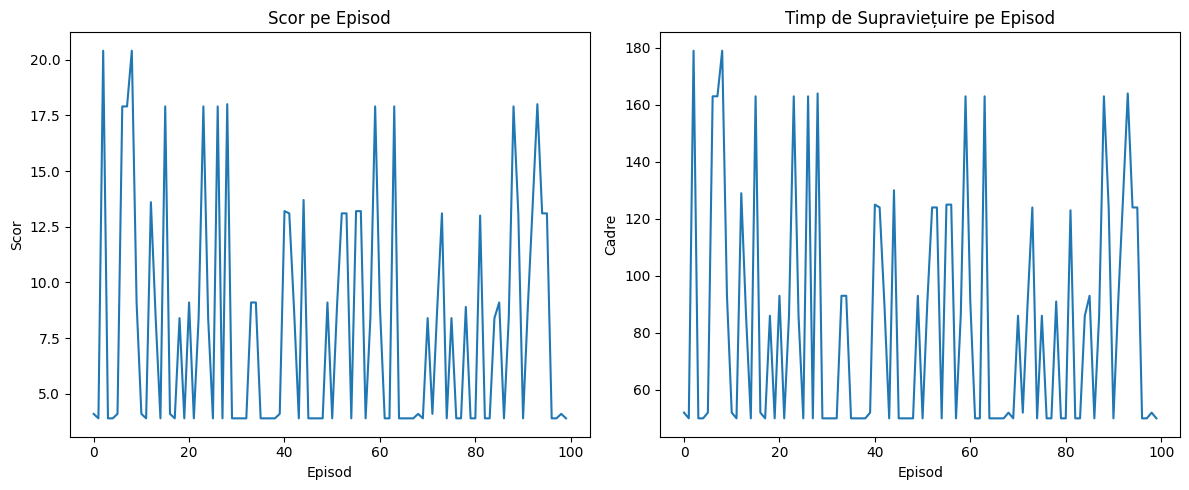

In [28]:
import matplotlib.pyplot as plt

def evaluate_model(env, actor, num_eval_episodes=100):
    scores = []
    survival_times = []
    pipes_passed = []

    for _ in range(num_eval_episodes):
        state = env.reset()[0]
        done = False
        episode_reward = 0
        frames = 0
        pipes = 0

        while not done:
            with torch.no_grad():
                action, _ = select_action_without_explore(state, actor)  # Politica deterministă (fără explorare)
            next_state, reward, done, info, _ = env.step(action)

            # Adunăm scorurile și statistici
            episode_reward += reward
            frames += 1
            if reward > 0.5:  # Ex: Recompensă mare pentru trecerea printr-un pipe
                pipes += 1

            state = next_state

        scores.append(episode_reward)
        survival_times.append(frames)
        pipes_passed.append(pipes)

    avg_score = np.mean(scores)
    avg_survival = np.mean(survival_times)
    avg_pipes = np.mean(pipes_passed)

    print(f"Evaluare pe {num_eval_episodes} episoade:")
    print(f"Scor mediu: {avg_score}")
    print(f"Timp mediu de supraviețuire: {avg_survival} cadre")
    print(f"Pipe-uri trecute în medie: {avg_pipes}")

    return scores, survival_times, pipes_passed


env = gymnasium.make("FlappyBird-v0", render_mode="rgb_array" , use_lidar=False)
# După antrenare:
scores, survival_times, pipes_passed = evaluate_model(env, actor3)

# Vizualizare
plt.figure(figsize=(12, 5))

# Recompensa medie
plt.subplot(1, 2, 1)
plt.plot(scores)
plt.title("Scor pe Episod")
plt.xlabel("Episod")
plt.ylabel("Scor")

# Supraviețuirea medie
plt.subplot(1, 2, 2)
plt.plot(survival_times)
plt.title("Timp de Supraviețuire pe Episod")
plt.xlabel("Episod")
plt.ylabel("Cadre")

plt.tight_layout()
plt.show()


In [208]:
import torch

def save_training_progress(actor, critic, actor_optimizer, critic_optimizer, replay_buffer,model_actiune_curenta, filepath):
    """
    Save the training progress including models, optimizers, and replay buffer.

    Parameters:
        actor (nn.Module): The actor model.
        critic (nn.Module): The critic model.
        model_actiune_curenta (nn.Module): The current action model.
        replay_buffer (deque): The replay buffer.
        actor_optimizer (torch.optim.Optimizer): The optimizer for the actor model.
        critic_optimizer (torch.optim.Optimizer): The optimizer for the critic model.
        filepath (str): The file path to save the progress.
    """""
    # Create a dictionary to hold all the state dictionaries
    checkpoint = {
        'actor_state_dict': actor.state_dict(),
        'critic_state_dict': critic.state_dict(),
        'actor_optimizer_state_dict': actor_optimizer.state_dict(),
        'model_actiune_curenta_state_dict': model_actiune_curenta.state_dict(),
        'replay_buffer': list(replay_buffer),  # Convert deque to list for saving
        'critic_optimizer_state_dict': critic_optimizer.state_dict()
    }
    # Compress and save the checkpoint
    with gzip.open(filepath, 'wb') as f:
        pickle.dump(checkpoint, f)
    
    

In [212]:
save_training_progress(actor3, critic3, actor_optimizer3, critic_optimizer3,replay_buffer,model_actiune_curenta, 'training_progress_compress.pth')

In [2]:
import gzip
import torch
import pickle

def load_training_progress(filepath, actor, critic, actor_optimizer,critic_optimizer,replay_buffer,model_actiune_curenta):
    """
    Load the training progress including models, optimizers, and replay buffer.

    Parameters:
        filepath (str): The file path to load the progress from.
        actor (nn.Module): The actor model.
        critic (nn.Module): The critic model.
        actor_optimizer (torch.optim.Optimizer): The optimizer for the actor model.
        critic_optimizer (torch.optim.Optimizer): The optimizer for the critic model.
        replay_buffer (deque): The replay buffer.
        model_actiune_curenta (nn.Module): The current CNN model.
    """""
    
    # Load and decompress the checkpoint
    with gzip.open(filepath, 'rb') as f:
        checkpoint = pickle.load(f)

    # Load the state dictionaries
    actor.load_state_dict(checkpoint['actor_state_dict'])
    critic.load_state_dict(checkpoint['critic_state_dict'])
    replay_buffer.extend(checkpoint['replay_buffer'])
    model_actiune_curenta.load_state_dict(checkpoint['model_actiune_curenta_state_dict'])
    actor_optimizer.load_state_dict(checkpoint['actor_optimizer_state_dict'])
    critic_optimizer.load_state_dict(checkpoint['critic_optimizer_state_dict'])

    

In [22]:
load_training_progress('training_progress_compress.pth', actor3, critic3, actor_optimizer3, critic_optimizer3,replay_buffer, model_actiune_curenta)

## Seeing dimensions for training progress file

In [215]:
import os

def get_file_size(file_path):
    size = os.path.getsize(file_path)
    return size

file1 = './training_progress_compress.pth'


size1 = get_file_size(file1)

print(f"Size of {file1}: {size1 / (1024 * 1024)} MB")


Size of ./training_progress_compress.pth: 38.83856773376465 MB


In [220]:
import sys

def get_size(obj, seen=None):
    """Recursively finds the size of objects."""
    size = sys.getsizeof(obj)
    if seen is None:
        seen = set()
    obj_id = id(obj)
    if obj_id in seen:
        return 0
    # Mark as seen
    seen.add(obj_id)
    if isinstance(obj, dict):
        size += sum([get_size(v, seen) for v in obj.values()])
        size += sum([get_size(k, seen) for k in obj.keys()])
    elif hasattr(obj, '__dict__'):
        size += get_size(obj.__dict__, seen)
    elif hasattr(obj, '__iter__') and not isinstance(obj, (str, bytes, bytearray)):
        size += sum([get_size(i, seen) for i in obj])
    return size

# Example usage
size_in_bytes = get_size(replay_buffer)
size_2 = get_size(model_actiune_curenta)
size_in_mb = size_in_bytes / (1024 * 1024)
size_in_mb2 = size_2 / (1024 * 1024)
print(f"Size of replay_buffer: {size_in_mb} MB")
print(f"Size of model_actiune_curenta: {size_in_mb2} MB")

Size of replay_buffer: 27.773784637451172 MB
Size of model_actiune_curenta: 0.019158363342285156 MB


In [219]:
print(len(replay_buffer))

20000
